# ANN

# Fashion MNIST


<br> By Margaret Maynard-Reid, 4/24/2018

![alt text](https://github.com/margaretmz/deep-learning/blob/master/images/modern%20dl_fash-mnist_keras.png?raw=1)

## Why Fashion-MNIST?


*   MNIST is too easy
*   MNIST is overused
*   MNIST can not represent modern Computer Vision tasks

Read more about the Fashion-MINST dataset in this paper [here](https://arxiv.org/abs/1708.07747) (**Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms**)



In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

4431872/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


## Visualize the data 반복실행 해보자

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 0 T-shirt/top


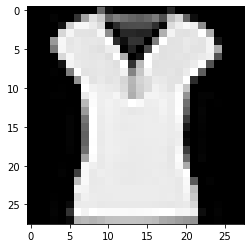

In [3]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = np.random.randint(0, 59999)
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index], cmap='gray')

In [4]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


##  코딩 task!

1. 전처리
    * x : sc_____
    * y : _______ encoding

2. 모델링
    * model에 모델 선언
    * Input layer에 어떻게 전달할 것인지 고민 필요
    * 쭈우우우욱 늘려주는 레이어를 사용할 것 (F______)
    * 히든레이어는 최소 3개를 쓸 것!
    * 노드 수는 512개를 기본으로 시작
    * 자유롭게 바꿔가며 성능을 볼 것

3. 학습
    * epochs=50, validation_split=0.2
    * early stopping

In [5]:
#############
# Your Code #
#############
# x : min-max scaling

max_num = x_train.max()
min_num = x_train.min()

x_train = (x_train - min_num) / (max_num - min_num)
x_test = (x_test - min_num) / (max_num - min_num)

(x_train.min(), x_train.max()), (x_test.min(), x_test.max())

((0.0, 1.0), (0.0, 1.0))

In [6]:
#############
# Your Code #
#############
# y : one-hot encoding

from tensorflow.keras.utils import to_categorical

y_len = len(set(y_train))

y_train = to_categorical(y_train, y_len)
y_test = to_categorical(y_test, y_len)

y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [9]:
#############
# Your Code #
#############
# 모델링

keras.backend.clear_session()

input_layer = keras.layers.Input(shape=x_train[0].shape, name='input')
flatten_layer = keras.layers.Flatten(name='flatten')(input_layer)
hiden_layer = keras.layers.Dense(512, activation='relu', name='hiden1')(flatten_layer)
hiden_layer = keras.layers.Dense(512, activation='relu', name='hiden2')(hiden_layer)
hiden_layer = keras.layers.Dense(512, activation='relu', name='hiden3')(hiden_layer)
output_layer = keras.layers.Dense(y_len, activation='softmax', name='output')(hiden_layer)

model = keras.models.Model(input_layer, output_layer)

model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'], optimizer=keras.optimizers.Adam())

#### 모델 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hiden1 (Dense)              (None, 512)               401920    
                                                                 
 hiden2 (Dense)              (None, 512)               262656    
                                                                 
 hiden3 (Dense)              (None, 512)               262656    
                                                                 
 output (Dense)              (None, 10)                5130      
                                                                 
Total params: 932,362
Trainable params: 932,362
Non-trainable

In [10]:
#############
# Your Code #
#############
# 모델 훈련

es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, restore_best_weights=True)

model.fit(x_train, y_train, epochs=50, validation_split=0.2, verbose=1, callbacks=es)

Epoch 1/50
1500/1500 [==============================] - 16s 11ms/step - loss: 0.4945 - accuracy: 0.8196 - val_loss: 0.4260 - val_accuracy: 0.8517
Epoch 2/50
1500/1500 [==============================] - 16s 10ms/step - loss: 0.3794 - accuracy: 0.8603 - val_loss: 0.3847 - val_accuracy: 0.8561
Epoch 3/50
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3383 - accuracy: 0.8749 - val_loss: 0.3700 - val_accuracy: 0.8683
Epoch 4/50
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3136 - accuracy: 0.8828 - val_loss: 0.3459 - val_accuracy: 0.8746
Epoch 5/50
1500/1500 [==============================] - 19s 13ms/step - loss: 0.2942 - accuracy: 0.8892 - val_loss: 0.3470 - val_accuracy: 0.8743
Epoch 6/50
1500/1500 [==============================] - 16s 11ms/step - loss: 0.2788 - accuracy: 0.8949 - val_loss: 0.3508 - val_accuracy: 0.8763
Epoch 7/50
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2678 - accuracy: 0.8999 - val_loss: 0.3444 -

## Visualize prediction

위에서 지키라고 한 사항들 안지키면 동작을 안할껄...?

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])
y_hat = model.predict(x_test).argmax(axis=1)


 Test accuracy: 0.886900007724762


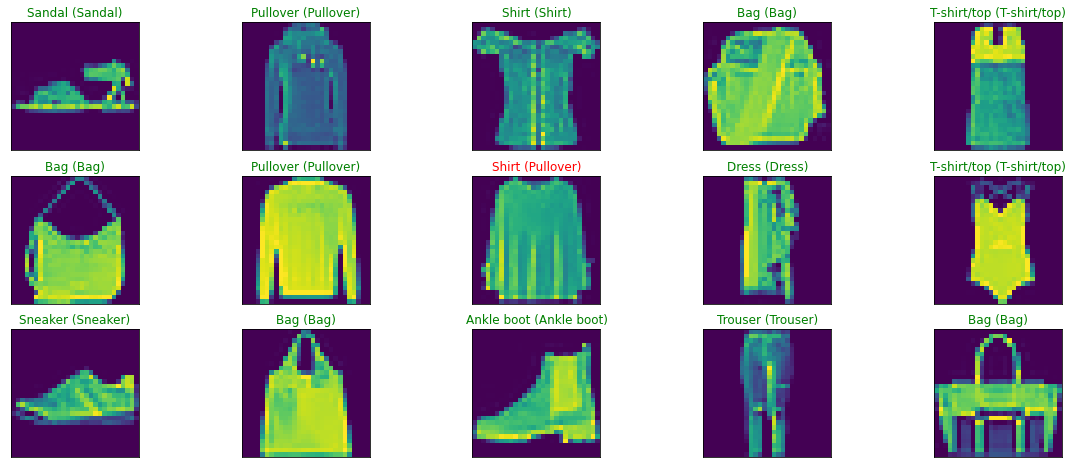

In [12]:
####### 반복실행해보자

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index].reshape([28,-1]) ) )
    predict_index = y_hat[index]
    true_index = y_test[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))